# Technical Indicator Strategy Fitter

## Introduction

The Technical Indicator Strategy Fitter fits a technical indicator-based trend-following trading strategy to historical data of a specified asset. It was developed to improve the speed and efficiency of strategy development. It utilises two optimisation methods: Bayesian optimisation and a custom-made stepwise search method. Indicator inputs are optimised relative to a custom scoring system, known as the 'Slap Score', which scores strategy performance metrics based on predefined buckets, summing the scores of each metric to form the Slap Score. Parameter robustness and out-of-sample testing is also conducted to confirm strategy performance and robustness.

## Background

### Manual Strategy Development

The Strategy Fitter was inspired by my experience in developing technical indicator-based trend-following strategies. Originally, I built strategies using TradingView's built-in coding language, Pine Script, where I would combine various indicators to generate buy and sell signals for individual assets, fitting the model to the time-series by manually adjusting indicator inputs.

Pine Script allows for easy implementation of price-volume-based quantitative code-based strategies, with built-in visualisation capabilities and performance analysis, making it ideal for developing technical indicator-based strategies on individual assets. An example strategy, fit to Bitcoin 1D price data, is shown below. The model was fitted to all data available at the time of construction.

<img src="images/Chart_image1.png" />

The strategy aims to enter long positions during rising trends and short positions during falling trends. The strategy works by combining technical indicators to produce buy and sell signals. A slice of code from the strategy is shown below. When the conditions are met, a buy or sell signal is generated.

<img src="images/Code_image.png" />

Inputs were manually fitted using Tradingview's UI. Fitting the model in this manner is a time-consuming and arduous process, which inspired the creation of the strategy fitter. The strategy shown above was constructed on September of 2024, using all available price data available at that time. Forward tested strategy performance is shown below.

<img src="images/Chart_image2.png" />

### Solving Strategy Development Efficiency Issues

Pine Script has limitations with strategy development, including:

- Limited data handling capabilities – Pine Script is limited to TradingView's price-volume data and offers no support for external datasets or in-/out-of-sample testing.
- No support for machine learning – Pine Script cannot integrate machine learning or other statistical analysis methods, limiting the development of sophisticated models and statistical analysis on strategy performance.
- No support for parameter fitting – Pine Script lacks automatic parameter optimisation, requiring manual parameter tuning that is time-consuming and inefficient.

A solution to Pine Script's limitations is to implement strategies in Python. Parameters can be fit automatically, speeding up strategy development and enabling faster implementation of these strategies across a broad range of assets. Python also supports easily implementation of in- and out-of-sample testing to confirm strategy robustness, as well as the ability to conduct statistical analysis on strategy performance.

### Fitting Method Description

The fitter begins with a Bayesian optimsation, sampling random input values within pre-defined ranges, measuring performance, and recording the best-performing inputs. These inputs become the starting point for the stepwise search: each input is iteratively adjusted across its range while holding other inputs constant, selecting the value that maximises performance before moving onto the next input. This process is repeated for every input until convergence in performance is reached (i.e., no further input adjustments improve performance). The resulting inputs form the final model.

The model is fit to the in-sample set, and is tested across out-of-sample data to confirm performance. Parameter robustness testing is also conducted, ensuring there are no massive swings in strategy performance upon small changes to individual inputs.

#### Performance Metrics

The following performance metrics are measured:
- **Equity Maximum Drawdown** – Largest drawdown in equity.
- **Intra-trade Maximum Drawdown** – Largest drawdown incurred within a single trade.
- **Sortino Ratio** – Risk-Adjusted returns penalising downside volatility.
- **Sharpe Ratio** – Risk-Adjusted returns relative to total volatility.
- **Profit Factor** – Ratio of gross profits to gross losses.
- **Percent Profitable** – Percentage of trades that close in profit.
- **Number of Trades** – Total number of closed trades.
- **Omega Ratio** – Ratio of total positive daily returns over total negative daily returns.
- **Half Kelly** – Recommended fraction of capital to risk per trade based on a conservative version of the Kelly criterion.
- **Net Profit** – Total profit of all closed trades.
- **Annualised Returns** – Average geometric returns, annualised.

#### Slap Score

As stated earlier, the performance metrics are filtered into buckets, where points are allocated to it. The Slap Score is computed as the sum of all the points from each of the following performance metrics.

<div style="display: flex; gap: 20px;">

| Equity Max DD    | Points Allocated |
|:----------------:|:----------------:|
|    $< 20$%       | 5 |
|  $20 - 25$%   | 4 |
|  $25 - 30$% |3 |
|  $30 - 35$% |2 |
|  $35 - 40$% |1|
|  $45 - 50$% |0|
|   $>= 50$% |-1|


| Intra-Trade Max DD | Points Allocated   |
|:----------------:|:----------------:|
| $< 20$% | 5|
|  $20 - 25$% | 4|
|  $25 - 30$% |3|
|  $30 - 35$% |2|
|  $35 - 40$% |1|
|  $45 - 50$% |0|
|   $>= 50$% |-1000|

| Sortino Ratio    | Points Allocated |
|:----------------:|:----------------:|
|   $< 2.1$ | -1|
| $2.1 - 2.3$ |0|
| $2.3 - 2.5$ |1|
| $2.5 - 2.7$ |2|
| $2.7 - 2.9$ |3|
| $2.9 - 3.1$| 4|
|   $>= 3.1$ |5|

| Sharpe Ratio     | Points Allocated |
|:----------------:|:----------------:|
|   $< 1.0$ | -1 |
| $1.0 - 1.2$ | 0|
| $1.2 - 1.4$ |1|
| $1.4 - 1.6$ |2|
| $1.6 - 1.8$ |3|
| $1.8 - 2.0$| 4|
|   $>= 2.0$ |5|

</div>

<div style="display: flex; gap: 20px;">

| Profit Factor    | Points Allocated |
|:----------------:|:----------------:|
|   $< 2.0$ | -1 |
| $2.0 - 2.5$ | 0|
| $2.5 - 3.0$ |1|
| $3.0 - 3.5$ |2|
| $3.5 - 4.0$ |3|
| $4.0 - 4.5$ |4|
|   $>= 4.5$ |5|

| Percent Profitable | Points Allocated |
|:----------------:|:----------------:|
|   $< 45$% | -1|
| $45 - 50$% |0|
| $50 - 55$% |1|
| $55 - 60$% |2|
| $60 - 65$% |3|
| $65 - 70$% |4|
|   $>= 70$% |5|

| Number of Trades | Points Allocated |
|:----------------:|:----------------:|
|    $< 30$ | -1|
|  $30 - 34$ | 5|
|  $35 - 39$ |4|
|  $40 - 44$ |3|
|  $45 - 54$ |2|
|  $55 - 79$ |1|
|   $>= 80$ |-1|

| Omega Ratio      | Points Allocated |
|:----------------:|:----------------:|
|    $< 1.1$ | -1|
| $1.1 - 1.15$ |0|
| $1.15 - 1.2$ |1|
| $1.2 - 1.25$ |2|
| $1.25 - 1.3$ |3|
| $1.3 - 1.35$| 4|
|  $>= 1.35$ |5|

</div>


Some things to note:
- Strategies with intra-trade max drawdowns greater than $50$% are assigned $-1000$ points. This is to severly punish strategies with excessively large intra-trade drawdowns, as such strategies are clearly problematic and should be excluded when fitting the model. Occasionally, during developmental stages, the fitter would produce a model with intra-trade drawdown greater than $100$%. Assigning points in this manner avoids these strategies from being produced.
- The number of trades is included in the Slap Score as strategies with excessive trades are more prone to overfitting and must be avoided. Strategies with too many or too few trades are punished, while strategies with a balanced number of trades are rewarded.
- Net Profit is used as a secondary scoring metric. If a change in inputs results in an increase to net profit, while slap score remains the same, those inputs will be selected as the best performing strategy.


## Strategy Description

The strategy logic was updated from what is shown in the Manual Strategy Development section. Previously, strategies often relied too heavily on a single indicator, making them particularly prone to overfitting, reducing robustness in forward testing. The new logic reduces dependence on any small subset of indicators, while allowing flexible testing of different indicator combinations. The new logic is described below.

A list of base indicators are specified through the `indicator_names` input. At every close, each indicator is assigned a score:
- +1 for long state
- -1 for short state
- 0 otherwise

The base signal is then generated by taking the average of these scores. 

Filters are then applied to the base signal. Each filter indicator is scored in the same manner as described above. Two sets of filters are defined, `long_filters` for long trades and `short_filters` for short trades. The scores within each set are averaged to produce the long and short filter signals, respectively.

The strategy takes positions based on the following criteria:

- Long trades are taken when base signal > 0 AND long filter signal > 0
- Short trades are taken when base signal < 0 AND short filter signal < 0
- Otherwise, the existing position is maintained.

### Parameter Robustness Testing

Parameter robustness testing evaluates how sensitive a strategy's performance is to small changes in its input parameters. Each parameter is adjusted in small, fixed increments around its base value, and the resulting performance metrics are recorded. The variability of each metric is measured using the coefficient of variation:

$CoV(X) = \frac{SD(X)}{E(X)}$

where $SD(X)$ is the standard deviation and E(X) is the mean of the metric across parameter variations. A smaller $CoV(X)$ indicates stable performance across changes in parameter settings, indicating strategy robustness. 

The function `param_robustness()` implements this test, and returns the average coefficient of variation for each metric. As a guide, $CoV(X)$ above 15% suggests poor robustness, while values below 10% are considered strong. For this application, robustess testing serves as a guide to assess stability rather than a strict rule for strategy selection.

## Core Functionality

### Optimiser Functions

Two primary optimiser functions were developed:
- `Optimiser_Bayes()` – Conducts a specified number of iterations of random input sampling, selecting the strategy with the highest performance.
- `Optimiser_Stepwise()` – Initially conducts Bayesian optimisation, then takes the highest performing strategy and conducts step-wise search optimisaiton, completing rotations until convergence in performance is found.

Each optimiser takes the following parameters:

- `data` *(DataFrame)* – Price-volume dataset for the asset.
- `nIterations` *(int)* – Number of Bayesian optimisation iterations to be conducted.
- `indicator_names` *(list[str])* – Base indicators used for the strategy
- `long_filters` *(list[str])* – Indicators used to filter long trades
- `short_filters` *(list[str])* – Indicators used to filter short trades
- `mode` *(str)* - Strategy type: 'LS' (perpetual long/short), 'L' (long only), 'S' (short only).
- `output_metric` *(str)* – Optimisation metric. Default is 'Slap Score', but also supports optimisation relative to specific metrics such as annualised returns, sharpe ratio, etc.
- `backtest_startdate` *(str)* – Start date for backtesting (Default: 1st January 2018).
- `backtest_endDate` *(str)* – End date for backtesting (Default: None, which optimises for the full dataset)

### Code Files

All code is spread across multiple files, each handling different components:

- `Optimisers.py` – Core functions for optimisation algorithms, including a backtest function, and optimiser engines.
- `PerformanceMetrics.py` – All functions used to calculate performance metrics, trade data, and equity
- `Indicators.py` – Functions for indicators, including functions used to combine indicators into strategies
- `RobustnessTesting.py` – Functions used to conduct parameter robustness testing
- `Plots.py` – Functions used for producing visual plots, including candlestick charts showing trade placement, and equity plots

A simplified version of the code is included in the Github repository. If you would like access to the full version, please contact me via email at william.keir9@gmail.com

## Strategy Development

In this section, we will showcase how the strategy fitter is used to construct a portfolio of technical-indicator based strategies, evaluating in- and out-of-sample performance. Regression analysis will also be conducted on portfolio returns.

### Initial Setup

We will fit a total of 6 strategies to 4 assets, all using 1D price-volume data:
- Bitcoin (BTC): 2 perpetual long/short strategies
- Ethereum (ETH): 2 perpetual long/short strategies
- Solana (SOL): 1 perpetual long/short strategy
- Dogecoin (DOGE): 1 perpetual long/short strategy

Indicators were chosen based on their complementary roles within the strategy. Base indicators are chosen to capture medium-term trends: fast enough to react to changing market conditions, but slow enough to avoid excessive noise. Filter indicators were chosen to be faster, serving to smooth out entry/exit signals without altering the overall structure of the strategy. This balance aims to improve signal quality while maintaining robustness across market regimes.

All price data is sourced from the Binance API. Strategies are fitted on in-sample data from 1st January 2018 to 1st January 2024, and tested on out-of-sample data from 1st January 2024 onwards.

In [1]:
# Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import Optimisers as op
import Plots as plot
import RobustnessTesting as rb
import PerformanceMetrics as pm

import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

In [2]:
# Set variables
backtest_startdate = pd.to_datetime('2018-01-01', utc=True)  # Backtest Start Date
backtest_enddate = pd.to_datetime('2024-01-01', utc=True)    # Backtest End Date (also used as start date for OOS testing)

output_metric = 'Slap Score'    # Optimisers will fit relative to Slap Score
bayes_iterations = 1000         # Number of Bayesian Optimisaiton iterations to be performed

In [3]:
# Data Retrieval
freq = '1d'                 # Timeframe of data
start_ts = '2016-12-31'     # Data retrieval start date
end_ts = '2026-01-01'       # Data retrieval end date

dataBTC = op.get_data(['BTCUSDT'], freq, start_ts, end_ts)
dataETH = op.get_data(['ETHUSDT'], freq, start_ts, end_ts)
dataSOL = op.get_data(['SOLUSDT'], freq, start_ts, end_ts)
dataDOGE = op.get_data(['DOGEUSDT'], freq, start_ts, end_ts)

### Bitcoin Strategy 1

Base indicators include 'MSD', 'ALMALag' and 'viiRSI'. Long trades are filtered with 'RTI_of_MA', while Short trades are filtered with 'RSI_X_Threshold'. This strategy will be optimised using the stepwise optimiser.

- **MSD** – Measures deviation of price from its median, designed to detect momentum shifts when price moves significantly away from the median.
- **ALMALag** – Produces signals based on a moving average's rate of change and whether price is above or below it, designed to detect shifts in trend direction.
- **viiRSI** – Takes the RSI of a moving average, with additional volatility filters to produce signals. 
- **RTI_of_MA** – Takes a Relative Trend Index (a calculation inspired by the RSI) of a moving average, generating a long signal when the indicator is above a constant threshold.
- **RSI_X_Threshold** – Produces signals when the RSI is above a long threshold or below a short threshold.

#### In-Sample

In [117]:
# Setup
mode = 'LS'

indicator_names = ['MSD', 'ALMALag', 'viiRSI']
long_filters = ['RTI_of_MA']
short_filters = ['RSI_X_Threshold']

# Run Fitter and Record Parameters and Performance Metrics
paramsBTC1, metricsBTC1_IS = op.Optimiser_Stepwise(dataBTC,
                                            bayes_iterations, 
                                            indicator_names, 
                                            long_filters, 
                                            short_filters,  
                                            mode, 
                                            output_metric, 
                                            backtest_startdate, 
                                            backtest_enddate
                                            )

STEPWISE OPTIMISATION COMPLETE. FINALISING RESULTS:

                    Metric     Value
0        Equity Max DD (%)     28.87
1   Intra-Trade Max DD (%)     20.67
2            Sortino Ratio      3.47
3             Sharpe Ratio      2.07
4            Profit Factor      3.56
5   Percent Profitable (%)     56.82
6         Number of Trades     44.00
7              Omega Ratio      1.40
8           Half Kelly (%)     22.34
9           Net Profit (%)  30329.33
10  Annualised Returns (%)    176.97
11              Slap Score     30.00

MSD: {'source': 'close', 'len_dema': 8, 'median_len': 59, 'atr_len': 27, 'atr_mul': 0.5, 'len_sd': 23}
ALMALag: {'source': 'hlc3', 'length': 47, 'maType': 'dema', 'offset': 0.0, 'sigma': 1.0}
viiRSI: {'source': 'close', 'maLen': 36, 'maType': 'tma', 'rsiLen': 11, 'sdLen': 7, 'lThresh': 48, 'sThresh': 35}
RTI_of_MA: {'source': 'close', 'rtiLen': 24, 'maLen': 6, 'sensitivity': 73, 'maType': 'wma', 'lThresh': 65, 'sThresh': 0}
RSI_X_Threshold: {'source': 'hlcc4', 

In [118]:
# Produce Trades and Equity Data (for plots)
tradesBTC1_IS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC1, mode, 'tradesDF', backtest_startdate, backtest_enddate)
equityBTC1_IS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC1, mode, 'equityDF', backtest_startdate, backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataBTC, tradesBTC1_IS, mode)

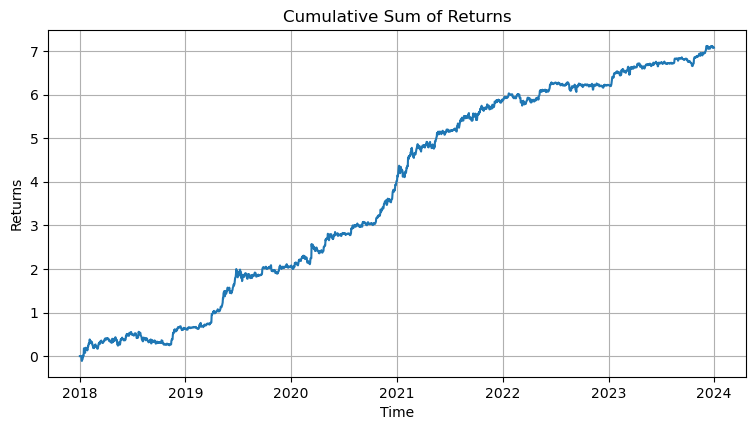

In [119]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityBTC1_IS)

In [120]:
# Print Metrics
print(metricsBTC1_IS)

                    Metric     Value
0        Equity Max DD (%)     28.87
1   Intra-Trade Max DD (%)     20.67
2            Sortino Ratio      3.47
3             Sharpe Ratio      2.07
4            Profit Factor      3.56
5   Percent Profitable (%)     56.82
6         Number of Trades     44.00
7              Omega Ratio      1.40
8           Half Kelly (%)     22.34
9           Net Profit (%)  30329.33
10  Annualised Returns (%)    176.97
11              Slap Score     30.00


In [121]:
# Robustness Testing
rbTestBTC1 = rb.param_robustness('metrics', dataBTC, indicator_names, long_filters, short_filters, paramsBTC1, 'LS', backtest_startdate, backtest_enddate)
print(rbTestBTC1)

                            CofV
Equity Max DD (%)       0.067190
Intra-Trade Max DD (%)  0.061514
Sortino Ratio           0.025719
Sharpe Ratio            0.022767
Profit Factor           0.047157
Percent Profitable (%)  0.018714
Number of Trades        0.019557
Omega Ratio             0.007900
Annualised Returns (%)  0.036848


#### Out of Sample

In [122]:
# Create OOS Dataframe for Candlestick Chart
dataBTC_OOS = dataBTC[dataBTC.index > backtest_enddate]

# Produce Trades, Equity and Metrics Data for Out-of-Sample Performance
tradesBTC1_OOS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC1, mode, 'tradesDF', backtest_enddate)
equityBTC1_OOS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC1, mode, 'equityDF', backtest_enddate)
metricsBTC1_OOS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC1, mode, 'MetricsTable', backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataBTC_OOS, tradesBTC1_OOS, mode)

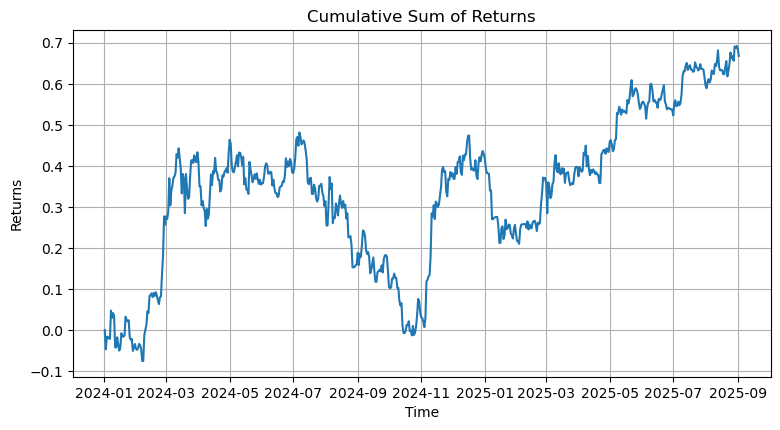

In [123]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityBTC1_OOS)

In [124]:
# Print Metrics
print(metricsBTC1_OOS)

                    Metric  Value
0        Equity Max DD (%)  41.30
1   Intra-Trade Max DD (%)  12.06
2            Sortino Ratio   1.30
3             Sharpe Ratio   0.86
4            Profit Factor   1.71
5   Percent Profitable (%)  28.57
6         Number of Trades  21.00
7              Omega Ratio   1.14
8           Half Kelly (%)  -6.60
9           Net Profit (%)  56.20
10  Annualised Returns (%)  33.91
11              Slap Score   1.00


### Bitcoin Strategy 2

This strategy uses 'DEMASMASD', 'DSSMASD' and 'HFL' for the base indicators, with 'RTI_MA_X' used to filter both long and short trades. This strategy will be optimised using the Bayesian optimiser.

- **DEMASMASD** – Takes a moving average of a Double Exponential Moving Average (DEMA) and generates signals based on price relative to this moving average and its standard deviation, designed to detect momentum shifts.
- **DSSMASD** – Uses a moving average and its standard deviation to generate signals, designed to identify shifts in momentum.
- **HFL** – Generates signals based on the how often a moving average has been increasing or decreasing over recent periods, identifiying short-term trend strength.
- **RTI_MA_X** – Computes a moving average of a Relative Trend Index, generating signals when the RTI is above or below its moving average.

#### In-Sample

In [12]:
# Setup
mode = 'LS'

indicator_names = ['DEMASMASD', 'DSSMASD', 'HFL']
long_filters = ['RTI_MA_X']
short_filters = ['RTI_MA_X']

# Run Fitter and Record Parameters and Performance Metrics
paramsBTC2, metricsBTC2_IS = op.Optimiser_Bayes(dataBTC,
                                            bayes_iterations, 
                                            indicator_names, 
                                            long_filters, 
                                            short_filters,  
                                            mode, 
                                            output_metric, 
                                            backtest_startdate, 
                                            backtest_enddate
                                            )

BAYESIAN OPTIMISATION COMPLETE. RESULTS:

                    Metric     Value
0        Equity Max DD (%)     34.24
1   Intra-Trade Max DD (%)     19.40
2            Sortino Ratio      2.96
3             Sharpe Ratio      1.77
4            Profit Factor      3.93
5   Percent Profitable (%)     53.66
6         Number of Trades     41.00
7              Omega Ratio      1.34
8           Half Kelly (%)     20.93
9           Net Profit (%)  10186.59
10  Annualised Returns (%)    131.31
11              Slap Score     25.00

DEMASMASD: {'source': 'open', 'maLen': 63, 'maType': 'sma', 'smaLen': 67, 'sdLen': 17}
DSSMASD: {'source': 'close', 'maLen': 39, 'maType': 'wma', 'sdLen': 26}
HFL: {'source': 'hlcc4', 'maLen': 11, 'maType': 'hma', 'startLen': 1, 'endLen': 50, 'lThresh': 40, 'sThresh': -10}
RTI_MA_X: {'source': 'hlc3', 'rtiLen': 27, 'maLen': 12, 'sensitivity': 72, 'maType': 'hma'}


In [13]:
# Produce Trades and Equity Data (for plots)
tradesBTC2_IS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, mode, 'tradesDF', backtest_startdate, backtest_enddate)
equityBTC2_IS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, mode, 'equityDF', backtest_startdate, backtest_enddate)
metricsBTC2_IS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, mode, 'MetricsTable', backtest_startdate, backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataBTC, tradesBTC2_IS, mode)

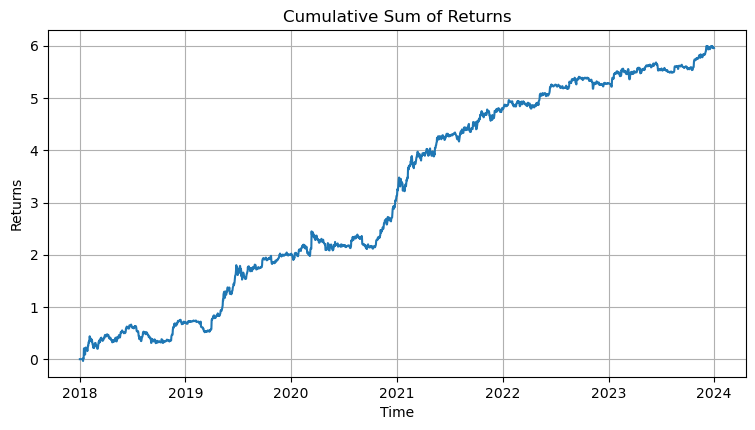

In [14]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityBTC2_IS)

In [15]:
# Print Metrics
print(metricsBTC2_IS)

                    Metric     Value
0        Equity Max DD (%)     34.24
1   Intra-Trade Max DD (%)     19.40
2            Sortino Ratio      2.96
3             Sharpe Ratio      1.77
4            Profit Factor      3.93
5   Percent Profitable (%)     53.66
6         Number of Trades     41.00
7              Omega Ratio      1.34
8           Half Kelly (%)     20.93
9           Net Profit (%)  10186.59
10  Annualised Returns (%)    131.31
11              Slap Score     25.00


In [16]:
# Robustness Testing
rbTestBTC2 = rb.param_robustness('metrics', dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, 'LS', backtest_startdate, backtest_enddate)
print(rbTestBTC2)

                            CofV
Equity Max DD (%)       0.084689
Intra-Trade Max DD (%)  0.171189
Sortino Ratio           0.031644
Sharpe Ratio            0.027033
Profit Factor           0.076844
Percent Profitable (%)  0.029944
Number of Trades        0.029711
Omega Ratio             0.008956
Annualised Returns (%)  0.042344


#### Out-of-Sample

In [17]:
# Produce Trades, Equity and Metrics Data for Out-of-Sample Performance
tradesBTC2_OOS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, mode, 'tradesDF', backtest_enddate)
equityBTC2_OOS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, mode, 'equityDF', backtest_enddate)
metricsBTC2_OOS = op.backtest(dataBTC, indicator_names, long_filters, short_filters, paramsBTC2, mode, 'MetricsTable', backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataBTC_OOS, tradesBTC2_OOS, mode)

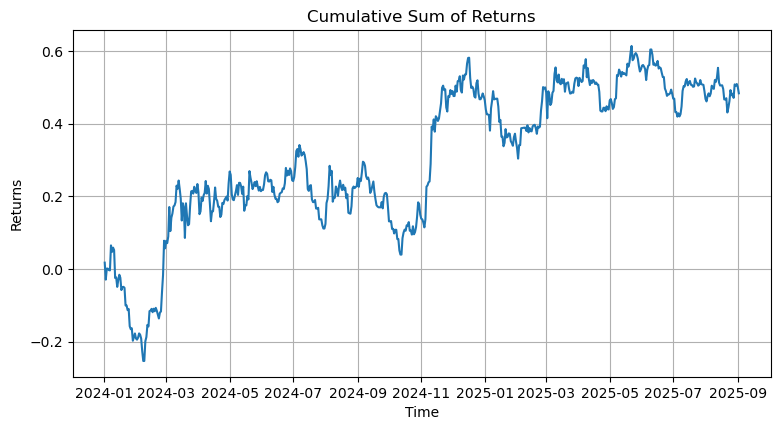

In [18]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityBTC2_OOS)

In [19]:
# Print Metrics
print(metricsBTC2_OOS)

                    Metric  Value
0        Equity Max DD (%)  27.91
1   Intra-Trade Max DD (%)  15.28
2            Sortino Ratio   0.96
3             Sharpe Ratio   0.63
4            Profit Factor   1.44
5   Percent Profitable (%)  34.78
6         Number of Trades  23.00
7              Omega Ratio   1.10
8           Half Kelly (%)  -5.25
9           Net Profit (%)  34.43
10  Annualised Returns (%)  20.40
11              Slap Score   3.00


### Ethereum Strategy 1

This strategy trades both long and short, using 'viiRSI', 'volStop', 'RTI_X_Threshold' and 'DSSMASD' as base indicators, with 'RSI_MA_X' used to filter both long and short trades. This strategy will be optimised using the stepwise optimiser.

- **viiRSI** – As explained above
- **volStop** – Produces signals from price relative to a trailing stop defined by a mving average and ATR multiples, identifying potential trend reversals
- **RTI_X_Threshold** – Computes the Relative Trend Index of price, generating signals if the RTI is above a long threshold or below a short threshold
- **DSSMASD** – As explained above
- **RSI_MA_X** – Computes a moving average of a RSI, producing signals based on whether the RSI is above or below its moving average.

#### In-Sample

In [150]:
# Setup
mode = 'LS'

indicator_names = ['viiRSI', 'volStop', 'RTI_X_Threshold', 'DSSMASD']
long_filters = ['RSI_MA_X']
short_filters = ['RSI_MA_X']

# Run Fitter and Record Parameters and Performance Metrics
paramsETH1, metricsETH1_IS = op.Optimiser_Stepwise(dataETH,
                                            bayes_iterations, 
                                            indicator_names, 
                                            long_filters, 
                                            short_filters,  
                                            mode, 
                                            output_metric, 
                                            backtest_startdate, 
                                            backtest_enddate
                                            )

STEPWISE OPTIMISATION COMPLETE. FINALISING RESULTS:

                    Metric      Value
0        Equity Max DD (%)      46.11
1   Intra-Trade Max DD (%)      27.70
2            Sortino Ratio       3.26
3             Sharpe Ratio       2.01
4            Profit Factor       5.69
5   Percent Profitable (%)      65.96
6         Number of Trades      47.00
7              Omega Ratio       1.38
8           Half Kelly (%)      29.99
9           Net Profit (%)  165362.26
10  Annualised Returns (%)     242.28
11              Slap Score      29.00

viiRSI: {'source': 'close', 'maLen': 30, 'maType': 'ema', 'rsiLen': 34, 'sdLen': 7, 'lThresh': 62, 'sThresh': 40}
volStop: {'source': 'hl2', 'length': 19, 'multiplier': 2.3}
RTI_X_Threshold: {'source': 'hlc3', 'rtiLen': 23, 'sensitivity': 81, 'lThresh': 56, 'sThresh': 52}
DSSMASD: {'source': 'hl2', 'maLen': 32, 'maType': 'dema', 'sdLen': 33}
RSI_MA_X: {'source': 'close', 'rsiLen': 7, 'maLen': 51, 'maType': 'tma'}


In [151]:
# Produce Trades and Equity Data (for plots)
tradesETH1_IS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH1, mode, 'tradesDF', backtest_startdate, backtest_enddate)
equityETH1_IS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH1, mode, 'equityDF', backtest_startdate, backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataETH, tradesETH1_IS, mode)

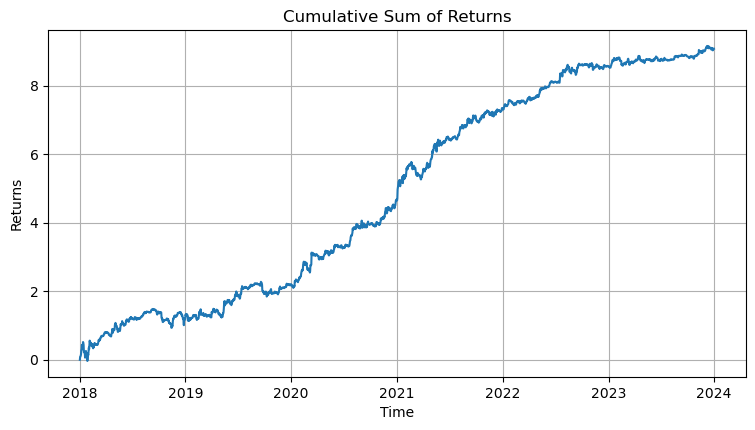

In [152]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityETH1_IS)

In [153]:
# Print Metrics
print(metricsETH1_IS)

                    Metric      Value
0        Equity Max DD (%)      46.11
1   Intra-Trade Max DD (%)      27.70
2            Sortino Ratio       3.26
3             Sharpe Ratio       2.01
4            Profit Factor       5.69
5   Percent Profitable (%)      65.96
6         Number of Trades      47.00
7              Omega Ratio       1.38
8           Half Kelly (%)      29.99
9           Net Profit (%)  165362.26
10  Annualised Returns (%)     242.28
11              Slap Score      29.00


In [154]:
# Robustness Testing
rbTestETH1 = rb.param_robustness('metrics', dataETH, indicator_names, long_filters, short_filters, paramsETH1, 'LS', backtest_startdate, backtest_enddate)
print(rbTestETH1)

                            CofV
Equity Max DD (%)       0.038593
Intra-Trade Max DD (%)  0.010347
Sortino Ratio           0.040793
Sharpe Ratio            0.036500
Profit Factor           0.160767
Percent Profitable (%)  0.036580
Number of Trades        0.056313
Omega Ratio             0.009873
Annualised Returns (%)  0.076993


#### Out-of-Sample

In [155]:
# Create OOS Dataframe for Candlestick Chart
dataETH_OOS = dataETH[dataETH.index > backtest_enddate]

# Produce Trades, Equity and Metrics Data for Out-of-Sample Performance
tradesETH1_OOS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH1, mode, 'tradesDF', backtest_enddate)
equityETH1_OOS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH1, mode, 'equityDF', backtest_enddate)
metricsETH1_OOS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH1, mode, 'MetricsTable', backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataETH_OOS, tradesETH1_OOS, mode)

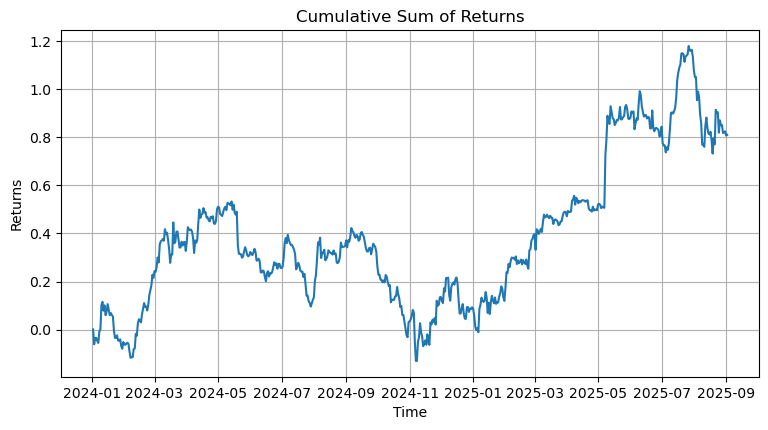

In [156]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityETH1_OOS)

In [157]:
# Print Metrics
print(metricsETH1_OOS)

                    Metric  Value
0        Equity Max DD (%)  52.12
1   Intra-Trade Max DD (%)  27.47
2            Sortino Ratio   1.21
3             Sharpe Ratio   0.78
4            Profit Factor   1.39
5   Percent Profitable (%)  33.33
6         Number of Trades  18.00
7              Omega Ratio   1.13
8           Half Kelly (%)  -7.31
9           Net Profit (%)  60.91
10  Annualised Returns (%)  34.15
11              Slap Score  -3.00


### Ethereum Strategy 2

This strategy uses 'RTI_of_MA', 'volStop' and 'MSD' as the base indicators, with the 'RTI_MA_X' indicator used to filter both long and short trades (all indicators have been described above). This strategy will be optimised using the Bayesian optimiser.

#### In-Sample

In [134]:
# Setup
mode = 'LS'

indicator_names = ['RTI_of_MA', 'volStop', 'MSD']
long_filters = ['RTI_MA_X']
short_filters = ['RTI_MA_X']

# Run Fitter and Record Parameters and Performance Metrics
paramsETH2, metricsETH2_IS = op.Optimiser_Bayes(dataETH,
                                            bayes_iterations, 
                                            indicator_names, 
                                            long_filters, 
                                            short_filters,  
                                            mode, 
                                            output_metric, 
                                            backtest_startdate, 
                                            backtest_enddate
                                            )

BAYESIAN OPTIMISATION COMPLETE. RESULTS:

                    Metric     Value
0        Equity Max DD (%)     58.41
1   Intra-Trade Max DD (%)     27.81
2            Sortino Ratio      2.25
3             Sharpe Ratio      1.44
4            Profit Factor      1.91
5   Percent Profitable (%)     51.92
6         Number of Trades     52.00
7              Omega Ratio      1.26
8           Half Kelly (%)     13.38
9           Net Profit (%)  10828.01
10  Annualised Returns (%)    128.21
11              Slap Score      9.00

RTI_of_MA: {'source': 'hlcc4', 'rtiLen': 30, 'maLen': 54, 'sensitivity': 78, 'maType': 'hma', 'lThresh': 63, 'sThresh': 19}
volStop: {'source': 'hl2', 'length': 9, 'multiplier': 2.9}
MSD: {'source': 'hl2', 'len_dema': 11, 'median_len': 61, 'atr_len': 2, 'atr_mul': 0.5, 'len_sd': 23}
RTI_MA_X: {'source': 'hl2', 'rtiLen': 35, 'maLen': 35, 'sensitivity': 90, 'maType': 'hma'}


In [135]:
# Produce Trades and Equity Data (for plots)
tradesETH2_IS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH2, mode, 'tradesDF', backtest_startdate, backtest_enddate)
equityETH2_IS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH2, mode, 'equityDF', backtest_startdate, backtest_enddate)
metricsETH2_IS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH2, mode, 'MetricsTable', backtest_startdate, backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataETH, tradesETH2_IS, mode)

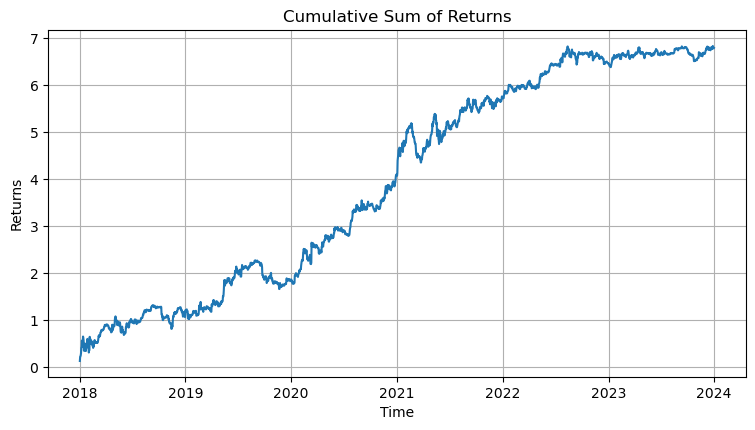

In [136]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityETH2_IS)

In [137]:
# Print Metrics
print(metricsETH2_IS)

                    Metric     Value
0        Equity Max DD (%)     58.41
1   Intra-Trade Max DD (%)     27.81
2            Sortino Ratio      2.25
3             Sharpe Ratio      1.44
4            Profit Factor      1.91
5   Percent Profitable (%)     51.92
6         Number of Trades     52.00
7              Omega Ratio      1.26
8           Half Kelly (%)     13.38
9           Net Profit (%)  10828.01
10  Annualised Returns (%)    128.21
11              Slap Score      9.00


In [138]:
# Robustness Testing
rbTestETH2 = rb.param_robustness('metrics', dataETH, indicator_names, long_filters, short_filters, paramsETH2, 'LS', backtest_startdate, backtest_enddate)
print(rbTestETH2)

                            CofV
Equity Max DD (%)       0.025533
Intra-Trade Max DD (%)  0.029527
Sortino Ratio           0.033167
Sharpe Ratio            0.029567
Profit Factor           0.056593
Percent Profitable (%)  0.022027
Number of Trades        0.033200
Omega Ratio             0.006800
Annualised Returns (%)  0.058587


#### Out-of-Sample

In [139]:
# Produce Trades, Equity and Metrics Data for Out-of-Sample Performance
tradesETH2_OOS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH2, mode, 'tradesDF', backtest_enddate)
equityETH2_OOS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH2, mode, 'equityDF', backtest_enddate)
metricsETH2_OOS = op.backtest(dataETH, indicator_names, long_filters, short_filters, paramsETH2, mode, 'MetricsTable', backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataETH_OOS, tradesETH2_OOS, mode)

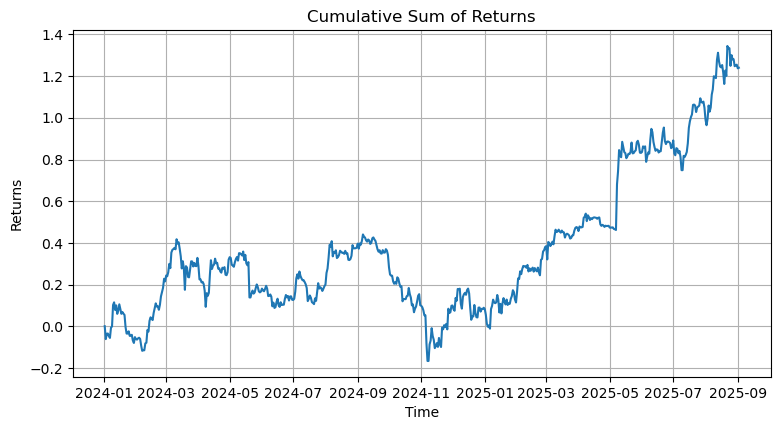

In [140]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityETH2_OOS)

In [141]:
# Print Metrics
print(metricsETH2_OOS)

                    Metric  Value
0        Equity Max DD (%)  50.34
1   Intra-Trade Max DD (%)  21.60
2            Sortino Ratio   1.88
3             Sharpe Ratio   1.20
4            Profit Factor   1.61
5   Percent Profitable (%)  35.71
6         Number of Trades  14.00
7              Omega Ratio   1.20
8           Half Kelly (%)  -2.11
9           Net Profit (%)  60.93
10  Annualised Returns (%)  73.63
11              Slap Score   2.00


### Solana Strategy

This strategy uses 'STC', 'ALMALag' and 'RTI_X_Threshold' as base indicators, with 'DMI_ForLoop' used to filter long trades, with 'RSI_X_Threshold' used to filter short trades. This strategy will be optimised using the stepwise optimiser.

- **STC** – The Schaff Trend Cycle is an enhancement of the traditional MACD indicator, used to quickly identify market trends.
- **DMI_ForLoop** – A smoothed Directional Movement Index (DMI) that averages values across a lookback window to identify trends.

All other indicators were described earlier.

#### In-Sample

In [81]:
# Setup
mode = 'LS'

indicator_names = ['STC', 'ALMALag', 'RTI_X_Threshold']
long_filters = ['DMI_ForLoop']
short_filters = ['RSI_X_Threshold']

# Run Fitter and Record Parameters and Performance Metrics
paramsSOL, metricsSOL_IS = op.Optimiser_Stepwise(dataSOL,
                                            bayes_iterations, 
                                            indicator_names, 
                                            long_filters, 
                                            short_filters,  
                                            mode, 
                                            output_metric, 
                                            backtest_startdate, 
                                            backtest_enddate
                                            )

STEPWISE OPTIMISATION COMPLETE. FINALISING RESULTS:

                    Metric      Value
0        Equity Max DD (%)      37.50
1   Intra-Trade Max DD (%)      19.06
2            Sortino Ratio       5.84
3             Sharpe Ratio       3.07
4            Profit Factor      10.78
5   Percent Profitable (%)      66.67
6         Number of Trades      30.00
7              Omega Ratio       1.69
8           Half Kelly (%)      31.79
9           Net Profit (%)  241079.22
10  Annualised Returns (%)    1502.03
11              Slap Score      35.00

STC: {'source': 'close', 'stcLen': 10, 'fastLen': 32, 'slowLen': 90, 'sensitivity': 0.1, 'fastMAType': 'wma', 'slowMAType': 'ema'}
ALMALag: {'source': 'hlc3', 'length': 25, 'maType': 'alma', 'offset': 0.9, 'sigma': 5.2}
RTI_X_Threshold: {'source': 'hl2', 'rtiLen': 41, 'sensitivity': 77, 'lThresh': 62, 'sThresh': 50}
DMI_ForLoop: {'startLen': 10, 'endLen': 10, 'maType': 'dema', 'maLen': 8}
RSI_X_Threshold: {'source': 'close', 'length': 13, 'lThresh'

In [82]:
# Produce Trades and Equity Data (for plots)
tradesSOL_IS = op.backtest(dataSOL, indicator_names, long_filters, short_filters, paramsSOL, mode, 'tradesDF', backtest_startdate, backtest_enddate)
equitySOL_IS = op.backtest(dataSOL, indicator_names, long_filters, short_filters, paramsSOL, mode, 'equityDF', backtest_startdate, backtest_enddate)
metricsSOL_IS = op.backtest(dataSOL, indicator_names, long_filters, short_filters, paramsSOL, mode, 'MetricsTable', backtest_startdate, backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataSOL, tradesSOL_IS, mode)

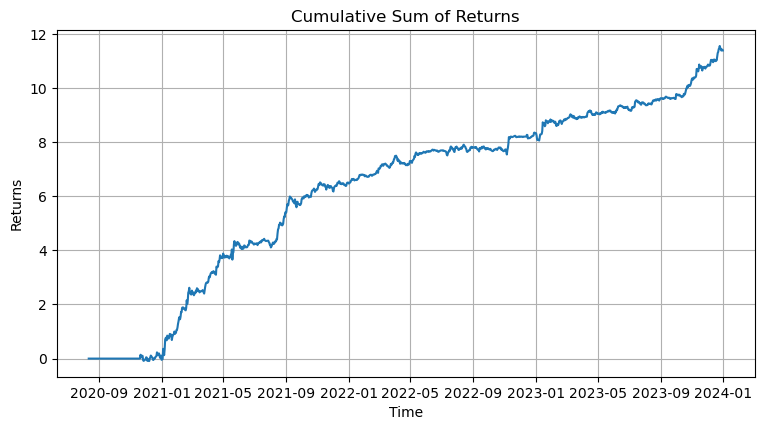

In [83]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equitySOL_IS)

In [84]:
# Print Metrics
print(metricsSOL_IS)

                    Metric      Value
0        Equity Max DD (%)      37.50
1   Intra-Trade Max DD (%)      19.06
2            Sortino Ratio       5.84
3             Sharpe Ratio       3.07
4            Profit Factor      10.78
5   Percent Profitable (%)      66.67
6         Number of Trades      30.00
7              Omega Ratio       1.69
8           Half Kelly (%)      31.79
9           Net Profit (%)  241079.22
10  Annualised Returns (%)    1502.03
11              Slap Score      35.00


In [85]:
# Robustness Testing
rbTestSOL = rb.param_robustness('metrics', dataSOL, indicator_names, long_filters, short_filters, paramsSOL, 'LS', backtest_startdate, backtest_enddate)
print(rbTestSOL)

                            CofV
Equity Max DD (%)       0.053641
Intra-Trade Max DD (%)  0.106200
Sortino Ratio           0.032435
Sharpe Ratio            0.027935
Profit Factor           0.225700
Percent Profitable (%)  0.058135
Number of Trades        0.049276
Omega Ratio             0.013641
Annualised Returns (%)  0.083947


#### Out-of-Sample

In [90]:
# Create OOS Dataframe for Candlestick Chart
dataSOL_OOS = dataSOL[dataSOL.index > backtest_enddate]

# Produce Trades, Equity and Metrics Data for Out-of-Sample Performance
tradesSOL_OOS = op.backtest(dataSOL, indicator_names, long_filters, short_filters, paramsSOL, mode, 'tradesDF', backtest_enddate)
equitySOL_OOS = op.backtest(dataSOL, indicator_names, long_filters, short_filters, paramsSOL, mode, 'equityDF', backtest_enddate)
metricsSOL_OOS = op.backtest(dataSOL, indicator_names, long_filters, short_filters, paramsSOL, mode, 'MetricsTable', backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataSOL_OOS, tradesSOL_OOS, mode)

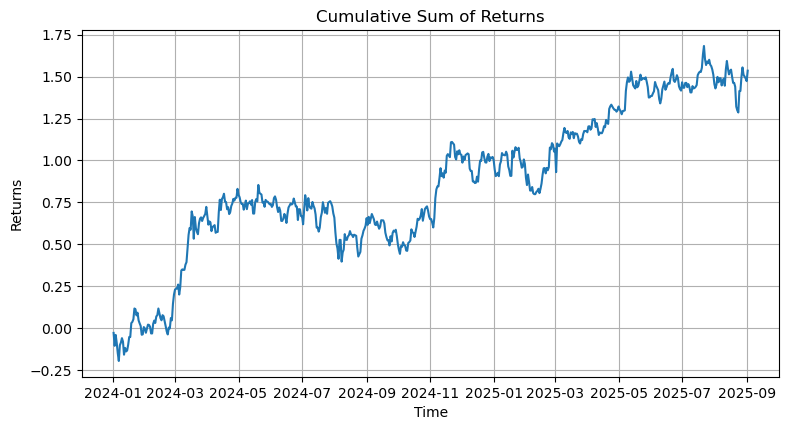

In [91]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equitySOL_OOS)

In [92]:
# Print Metrics
print(metricsSOL_OOS)

                    Metric   Value
0        Equity Max DD (%)   41.19
1   Intra-Trade Max DD (%)   30.98
2            Sortino Ratio    1.91
3             Sharpe Ratio    1.21
4            Profit Factor    2.43
5   Percent Profitable (%)   50.00
6         Number of Trades   20.00
7              Omega Ratio    1.19
8           Half Kelly (%)   14.71
9           Net Profit (%)  157.20
10  Annualised Returns (%)   88.33
11              Slap Score    4.00


### Dogecoin Strategy

This strategy uses 'RTI_of_MA', 'volStop' and 'MSD' as base indicators, with 'DMI_ForLoop' used to filter long trades, with 'RTI_MA_X' used to filter short trades. This strategy will be optimised using the Bayesian optimiser.

#### In-Sample

In [49]:
# Setup
mode = 'LS'

indicator_names = ['RTI_of_MA', 'volStop', 'MSD'] 
long_filters = ['RTI_MA_X']
short_filters = ['RTI_MA_X']

# Run Fitter and Record Parameters and Performance Metrics
paramsDOGE, metricsDOGE_IS = op.Optimiser_Bayes(dataDOGE,
                                            bayes_iterations, 
                                            indicator_names, 
                                            long_filters, 
                                            short_filters,  
                                            mode, 
                                            output_metric, 
                                            backtest_startdate, 
                                            backtest_enddate
                                            )

BAYESIAN OPTIMISATION COMPLETE. RESULTS:

                    Metric     Value
0        Equity Max DD (%)     72.56
1   Intra-Trade Max DD (%)     46.36
2            Sortino Ratio      4.06
3             Sharpe Ratio      1.13
4            Profit Factor      5.84
5   Percent Profitable (%)     58.06
6         Number of Trades     31.00
7              Omega Ratio      1.53
8           Half Kelly (%)     25.44
9           Net Profit (%)  28647.49
10  Annualised Returns (%)    275.51
11              Slap Score     21.00

RTI_of_MA: {'source': 'close', 'rtiLen': 32, 'maLen': 14, 'sensitivity': 93, 'maType': 'dema', 'lThresh': 74, 'sThresh': 17}
volStop: {'source': 'open', 'length': 5, 'multiplier': 3.0}
MSD: {'source': 'close', 'len_dema': 9, 'median_len': 62, 'atr_len': 20, 'atr_mul': 0.3, 'len_sd': 27}
RTI_MA_X: {'source': 'close', 'rtiLen': 15, 'maLen': 24, 'sensitivity': 87, 'maType': 'dema'}


In [50]:
# Produce Trades and Equity Data (for plots)
tradesDOGE_IS = op.backtest(dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, mode, 'tradesDF', backtest_startdate, backtest_enddate)
equityDOGE_IS = op.backtest(dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, mode, 'equityDF', backtest_startdate, backtest_enddate)
metricsDOGE_IS = op.backtest(dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, mode, 'MetricsTable', backtest_startdate, backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataDOGE, tradesDOGE_IS, mode)

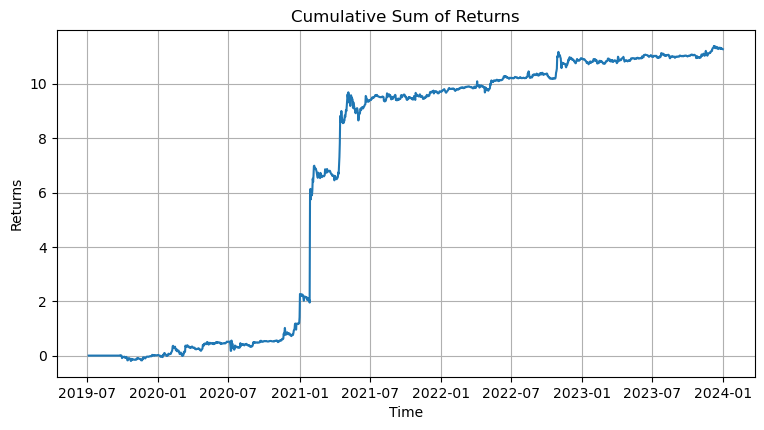

In [51]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityDOGE_IS)

In [52]:
# Print Metrics
print(metricsDOGE_IS)

                    Metric     Value
0        Equity Max DD (%)     72.56
1   Intra-Trade Max DD (%)     46.36
2            Sortino Ratio      4.06
3             Sharpe Ratio      1.13
4            Profit Factor      5.84
5   Percent Profitable (%)     58.06
6         Number of Trades     31.00
7              Omega Ratio      1.53
8           Half Kelly (%)     25.44
9           Net Profit (%)  28647.49
10  Annualised Returns (%)    275.51
11              Slap Score     21.00


In [53]:
# Robustness Testing
rbTestDOGE = rb.param_robustness('metrics', dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, 'LS', backtest_startdate, backtest_enddate)
print(rbTestDOGE)

                            CofV
Equity Max DD (%)       0.007987
Intra-Trade Max DD (%)  0.006947
Sortino Ratio           0.016980
Sharpe Ratio            0.013853
Profit Factor           0.224967
Percent Profitable (%)  0.044793
Number of Trades        0.031953
Omega Ratio             0.006493
Annualised Returns (%)  0.047620


#### Out-of-Sample

In [54]:
# Create OOS Dataframe for Candlestick Chart
dataDOGE_OOS = dataDOGE[dataDOGE.index > backtest_enddate]

# Produce Trades, Equity and Metrics Data for Out-of-Sample Performance
tradesDOGE_OOS = op.backtest(dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, mode, 'tradesDF', backtest_enddate)
equityDOGE_OOS = op.backtest(dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, mode, 'equityDF', backtest_enddate)
metricsDOGE_OOS = op.backtest(dataDOGE, indicator_names, long_filters, short_filters, paramsDOGE, mode, 'MetricsTable', backtest_enddate)

# Plot Candlestick Chart for Trade Visualisation
plot.candleChart(dataDOGE_OOS, tradesDOGE_OOS, mode)

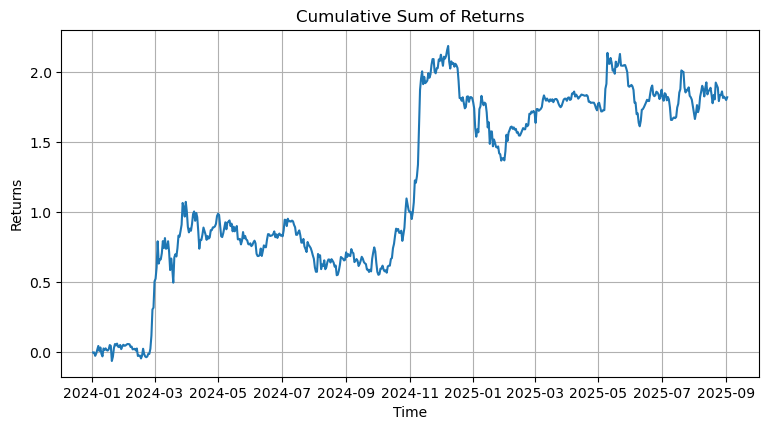

In [55]:
# Plot Cumulative Sum of Returns
plot.retsPlot(equityDOGE_OOS)

In [56]:
# Print Metrics
print(metricsDOGE_OOS)

                    Metric   Value
0        Equity Max DD (%)   59.97
1   Intra-Trade Max DD (%)   38.11
2            Sortino Ratio    1.85
3             Sharpe Ratio    1.15
4            Profit Factor    1.60
5   Percent Profitable (%)   30.77
6         Number of Trades   13.00
7              Omega Ratio    1.19
8           Half Kelly (%)   -6.25
9           Net Profit (%)  169.63
10  Annualised Returns (%)   91.82
11              Slap Score   -3.00


## Portfolio of Strategies

Next we will combine each of these strategies into a portfolio. We will also investigate in- and out-of-sample performance of an equally weighted, Sharpe optimised and minimum variance portfolio.

### In Sample

In [158]:
# Extract daily percent change of equity of strategies
retsBTC1IS = pd.Series(equityBTC1_IS['equity'].pct_change(), index=equityBTC1_IS.index)
retsBTC2IS = pd.Series(equityBTC2_IS['equity'].pct_change(), index=equityBTC2_IS.index)
retsETH1IS = pd.Series(equityETH1_IS['equity'].pct_change(), index=equityETH1_IS.index)
retsETH2IS = pd.Series(equityETH2_IS['equity'].pct_change(), index=equityETH2_IS.index)
retsSOLIS = pd.Series(equitySOL_IS['equity'].pct_change(), index=equitySOL_IS.index)
retsDOGEIS = pd.Series(equityDOGE_IS['equity'].pct_change(), index=equityDOGE_IS.index)


In [159]:
# Equal Weight Allocation
port_equalw_IS = (
    retsBTC1IS +
    retsBTC2IS +
    retsETH1IS +
    retsETH2IS +
    retsSOLIS +
    retsDOGEIS
) / 6

# Max Sharpe and Min Variance Setup:
values = np.random.dirichlet(np.ones(6), size=1)[0]
maxSharpe = 0
maxValues = []
maxPort = []

minVar = np.inf
minVarValues = []
minVarPort = []

# Compute Max Sharpe and Min Variance Weights (through random assigning of weights)
for i in range(5000):
    values = np.random.dirichlet(np.ones(6), size=1)[0]

    portIS_Loop = (
        retsBTC1IS * values[0] +
        retsBTC2IS * values[1] +
        retsETH1IS * values[2] +
        retsETH2IS * values[3] +
        retsSOLIS * values[4] +
        retsDOGEIS * values[5]
    )

    sharpe = portIS_Loop.mean() / portIS_Loop.std() * np.sqrt(365)
    var = portIS_Loop.std() * np.sqrt(365)

    if sharpe > maxSharpe:
        maxSharpe = sharpe
        maxValues = values
        maxPort = portIS_Loop
    
    if var < minVar:
        minVar = var
        minVarValues = values
        minVarPort = portIS_Loop


# Drop N/A's
port_equalw_IS = port_equalw_IS.dropna()
maxPort = maxPort.dropna()
minVarPort = minVarPort.dropna()

# Print Results
print("EQUAL WEIGHTS:")
print(pm.portMetricsTable(port_equalw_IS))
print()

print("MAX SHARPE:")
print("Weights:")
print(maxValues)
print(pm.portMetricsTable(maxPort))
print()

print("MIN VARIANCE:")
print("Weights:")
print(minVarValues)
print(pm.portMetricsTable(minVarPort))

EQUAL WEIGHTS:
                    Metric  Values
0             Sharpe Ratio    2.88
1  Equity Max Drawdown (%)   20.02
2         Winning Days (%)   54.81
3   Annualised Returns (%)  453.16

MAX SHARPE:
Weights:
[0.16159848 0.1456577  0.21807173 0.01045782 0.41634251 0.04787176]
                    Metric  Values
0             Sharpe Ratio    3.69
1  Equity Max Drawdown (%)   18.51
2         Winning Days (%)   54.08
3   Annualised Returns (%)  690.19

MIN VARIANCE:
Weights:
[0.2482472  0.45262239 0.1533357  0.02841793 0.10530283 0.01207395]
                    Metric  Values
0             Sharpe Ratio    2.94
1  Equity Max Drawdown (%)   19.55
2         Winning Days (%)   54.89
3   Annualised Returns (%)  276.68


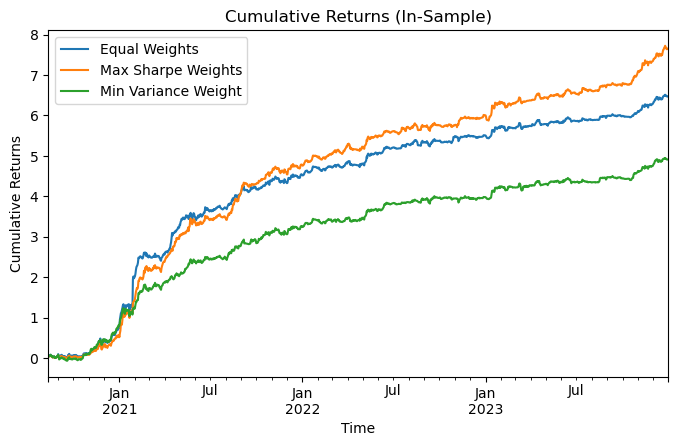

In [160]:
# Plot cumulative sum of returns
plt.figure(figsize=(8, 4.5))

port_equalw_IS.cumsum().plot(label='Equal Weights')
maxPort.cumsum().plot(label='Max Sharpe Weights')
minVarPort.cumsum().plot(label='Min Variance Weight')

plt.title("Cumulative Returns (In-Sample)")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()

plt.show()

### Out-of-Sample

In [161]:
# Extract daily percent change of equity of strategies
retsBTC1OOS = pd.Series(equityBTC1_OOS['equity'].pct_change(), index=equityBTC1_OOS.index)
retsBTC2OOS = pd.Series(equityBTC2_OOS['equity'].pct_change(), index=equityBTC2_OOS.index)
retsETH1OOS = pd.Series(equityETH1_OOS['equity'].pct_change(), index=equityETH1_OOS.index)
retsETH2OOS = pd.Series(equityETH2_OOS['equity'].pct_change(), index=equityETH2_OOS.index)
retsSOLOOS = pd.Series(equitySOL_OOS['equity'].pct_change(), index=equitySOL_OOS.index)
retsDOGEOOS = pd.Series(equityDOGE_OOS['equity'].pct_change(), index=equityDOGE_OOS.index)

In [162]:
# Equal Weight Portfolio Returns
port_equalw_OOS = (
    retsBTC1OOS +
    retsBTC2OOS +
    retsETH1OOS +
    retsETH2OOS +
    retsSOLOOS +
    retsDOGEOOS 
) / 6

# Sharpe Optimised Portfolio Returns
portOOS_optim_SR = (
    retsBTC1OOS * maxValues[0] +
    retsBTC2OOS * maxValues[1] +
    retsETH1OOS * maxValues[2] +
    retsETH2OOS * maxValues[3] +
    retsSOLOOS * maxValues[4] +
    retsDOGEOOS * maxValues[5] 
)

# Minimum Variance Portfolio Returns
portOOS_optim_Var = (
    retsBTC1OOS * minVarValues[0] +
    retsBTC2OOS * minVarValues[1] +
    retsETH1OOS * minVarValues[2] +
    retsETH2OOS * minVarValues[3] +
    retsSOLOOS * minVarValues[4] +
    retsDOGEOOS * minVarValues[5] 
)

# Print Returns
print("EQUAL WEIGHTS:")
print(pm.portMetricsTable(port_equalw_OOS))
print()

print("MAX SHARPE:")
print("Weights:")
print(maxValues)
print()
print(pm.portMetricsTable(portOOS_optim_SR))
print()

print("MIN VARIANCE:")
print("Weights:")
print(minVarValues)
print()
print(pm.portMetricsTable(portOOS_optim_Var))

EQUAL WEIGHTS:
                    Metric  Values
0             Sharpe Ratio    1.39
1  Equity Max Drawdown (%)   28.35
2         Winning Days (%)   51.39
3   Annualised Returns (%)   72.10

MAX SHARPE:
Weights:
[0.16159848 0.1456577  0.21807173 0.01045782 0.41634251 0.04787176]

                    Metric  Values
0             Sharpe Ratio    1.35
1  Equity Max Drawdown (%)   30.17
2         Winning Days (%)   52.05
3   Annualised Returns (%)   70.93

MIN VARIANCE:
Weights:
[0.2482472  0.45262239 0.1533357  0.02841793 0.10530283 0.01207395]

                    Metric  Values
0             Sharpe Ratio    1.06
1  Equity Max Drawdown (%)   28.01
2         Winning Days (%)   50.08
3   Annualised Returns (%)   42.00


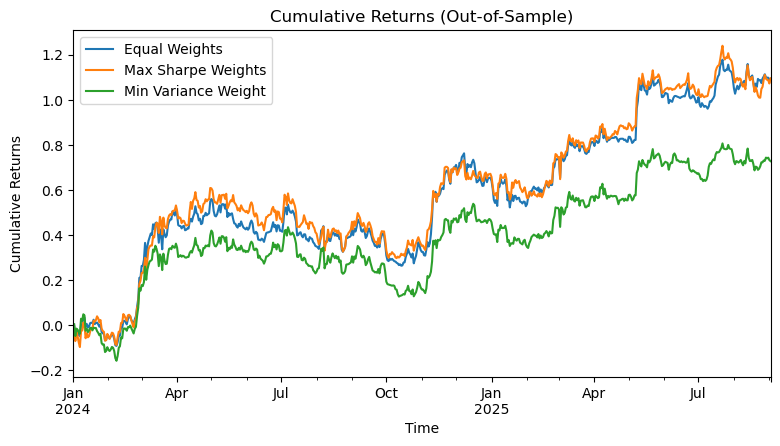

In [163]:
# Plot cumulative sum of returns
plt.figure(figsize=(9, 4.5))

port_equalw_OOS.cumsum().plot(label='Equal Weights')
portOOS_optim_SR.cumsum().plot(label='Max Sharpe Weights')
portOOS_optim_Var.cumsum().plot(label='Min Variance Weight')

plt.title("Cumulative Returns (Out-of-Sample)")
plt.xlabel("Time")
plt.ylabel("Cumulative Returns")
plt.legend()

plt.show()

## Regression Analysis

Here, we will conduct regression analysis on the equal weight portfolio.

### In-Sample

In [164]:
# Create DataFrame of Returns
port = port_equalw_IS

dataRegIS = pd.DataFrame({
    'port': port,
    'BTC': dataBTC['close'].pct_change(),
    'ETH': dataETH['close'].pct_change(),
    'SOL': dataSOL['close'].pct_change(),
    'DOGE': dataDOGE['close'].pct_change()
})

dataRegIS = dataRegIS.dropna()

# Create Regression Variables
y = dataRegIS['port']
X = dataRegIS[['BTC', 'ETH', 'SOL', 'DOGE']]

X = sm.add_constant(X)

# Fit Model
model = sm.OLS(y, X).fit()

# Print Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   port   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     195.7
Date:                Thu, 04 Sep 2025   Prob (F-statistic):          6.50e-130
Time:                        16:08:43   Log-Likelihood:                 2709.2
No. Observations:                1237   AIC:                            -5408.
Df Residuals:                    1232   BIC:                            -5383.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      5.370      0.0

### Out-of-Sample

In [165]:
# Create Dataframe of Returns
port = port_equalw_OOS

dataRegOOS = pd.DataFrame({
    'port': port,
    'BTC': dataBTC['close'].pct_change(),
    'ETH': dataETH['close'].pct_change(),
    'SOL': dataSOL['close'].pct_change(),
    'DOGE': dataDOGE['close'].pct_change()
})

dataRegOOS = dataRegOOS.dropna()

# Create Regression Variables
y = dataRegOOS['port']
X = dataRegOOS[['BTC', 'ETH', 'SOL', 'DOGE']]

X = sm.add_constant(X)

# Fit Model
model = sm.OLS(y, X).fit()

# Print Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   port   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     13.26
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           2.33e-10
Time:                        16:08:45   Log-Likelihood:                 1419.6
No. Observations:                 610   AIC:                            -2829.
Df Residuals:                     605   BIC:                            -2807.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.789      0.0

## Conclusion

The Technical Indicator Strategy Fitter was created to streamline the strategy development process for creating trend-following strategies aimed at taking directional trades on various crypto-assets. It fits a strategy to historical price-volume data, optimising for performance. Parameter robustness and out-of-sample performance testing is also conducted.

In out-of-sample testing, these strategies exhibited strong positive returns, with the equally weighted portfolio producing a Sharpe Ratio of 1.39 and annualised returns of 72.10%. When linear regressing the out-of-sample performance against the base assets, the alpha coefficient came to 0.17%, which was marginally not statistically significant, with a p-value of 0.074. Beta coefficients to BTC, SOL and DOGE were statistically significant, with small negative values for BTC and SOL, and a small positive value for DOGE. 

The portfolio exhibiting statistically significant beta to their base assets, alongside a statistically insignificant alpha, is intuitive, as the strategies primarily aim to take directional bets on these assets. While the goal of these strategies is not necessarily aimed at alpha generation, the results show that strategy returns are largely driven by timed exposures to the underlying assets, which was the intention behind the original development of these strategies.

### Observations and Improvements

#### Indicator Selection vs Parameter Optimisation

A key observation made during both the original system development and the construction of the strategies in this report is the importance of prioritising indicator selection over parameter optimisation. Parameter optimisation can be seen as refining or polishing a system, but such refinement is meaningless if the core of the strategy does not work as intended. The real edge in any strategy comes from choosing the right indicators, not from optimising parameters. Anyone can write an algorithm to optimise parameters, but not everyone can create or search out high quality indicators that form the core of a strategy.

#### Long/Short vs Long Only Strategies

In-sample performance suggests that the long/short strategies perform strongly, but these strategies are generally more prone to overfitting and therefore are more likely to underperform out-of-sample compared to their long-only counterparts. A trader who wishes to live trade this portfolio of strategies while taking on less risk could trade these strategies long-only. Doing so would increase the correlation of portfolio returns relative to the underlying assets, which would increase beta exposure, however, since most of the returns of these strategies are generated by the long positions, the portfolio will likely remain profitable while taking on less risk. Alternatively, retaining some short exposure could help to reduce overall correlation to the base assets and increase diversification of the portfolio, though this comes with the cost of potentially higher overfitting risk.

#### Walk-Forward Fitting

To improve the adaptability and robustness of these strategies, one approach is to implement walk-forward fitting. In this process, the model is repeatedly fit to a rolling window of historical data, for example, fit to all data up to a given point, then tested out-of-sample on the subsequent 12-month period. After each test, this out-of-sample window is added to the in-sample set, and the process is repeated forward through the full dataset. This allows the strategies to continuously adapt to new information, becoming more robust overtime as the model is fit to a larger variety of market conditions.

#### Expanding to Trade More Assets

To further increase uncorrelated returns of the portfolio relative to the market, one approach is to including more assets and build multiple strategies on each asset. By trading a broader range of asset classes, such as equities, ETF's, commodities, and other asset classes, the portfolio is less reliant on the performance of a single asset, asset class, or strategy. This reduces correlation of the portfolio to the underlying assets, potentially increasing the overall alpha produced. Expanding the number of assets can also help to reduce portfolio drawdowns, as gains from one strategy may offset losses from another, improving risk-adjusted performance of the overall portfolio. 

Additionally, including more assets will increase the scalability of the portfolio. More assets means more market liquidity, allowing greater sums of capital to be deployed without incurring significant slippage, making the portfolio more suited for institutional-level trading.

#### Developing Cross-Sectional or Time-Series Trading Strategies Using These Strategies as the Underlying

To add more sophistocation, the strategies themselves can be traded using cross-sectional or time-series techniques. For example, a cross-sectional momentum approach could involve going long on the top-performing stategies and short on the underperforming ones. This approach has the potential to generate additional alpha by exploiting relative performance differences between the strategies. 